In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Import data

In [3]:
mortality_ratio_cols = ['GEO_NAME_SHORT', 'DIM_TIME', 'VALUE_NUMERIC', 'VALUE_NUMERIC_LOWER', 'VALUE_NUMERIC_UPPER']
mortality_ratio_df = pd.read_csv('mortality_ratio_data/WHO_mortality_ratios.csv', usecols=mortality_ratio_cols)

demo_ind_cols = ['Location', 'Time', 'LExFemale']
demo_ind_df = pd.read_csv('mortality_ratio_data/WPP2022_Demographic_Indicators.csv', usecols=demo_ind_cols)

#### Clean DataFrame headers

In [4]:
mortality_ratio_colnames = {'GEO_NAME_SHORT': 'Country',
                            'DIM_TIME': 'Year',
                            'VALUE_NUMERIC': 'Mortality ratio',
                            'VALUE_NUMERIC_LOWER': 'Mortality ratio lower',
                            'VALUE_NUMERIC_UPPER': 'Mortality ration upper',
                            }
mortality_ratio_df.rename(columns=mortality_ratio_colnames, inplace=True)

demo_ind_colnames = {'Location': 'Country',
                     'Time': 'Year',
                     'LExFemale': 'Female life expectancy',
                     }
demo_ind_df.rename(columns=demo_ind_colnames, inplace=True)

#### Filter data to world level

In [5]:
world_mortality_df = mortality_ratio_df[mortality_ratio_df['Country']=='World']

mask = (demo_ind_df['Country'] == 'World') & (demo_ind_df['Year'] <= 2020)
fem_life_exp_df = demo_ind_df[mask]

#### Drop unused columns

In [6]:
cleaned_world_mortality_df = world_mortality_df.drop(columns='Country').reset_index(drop=True)
cleaned_fem_life_exp_df = fem_life_exp_df.drop(columns='Country').reset_index(drop=True)

#### Merge DataFrames

In [7]:
result = pd.merge(left=cleaned_world_mortality_df,right=cleaned_fem_life_exp_df, how='left', on='Year')

In [8]:
result.head()

,Year,Mortality ratio,Mortality ratio lower,Mortality ration upper,Female life expectancy
0,1985,441.27849,403.31635,489.65762,64.6888
1,1986,421.14916,386.66297,464.46754,65.2136
2,1987,410.95013,378.82312,448.84694,65.6390
3,1988,404.36597,374.31049,439.00317,65.7903
4,1989,391.66339,363.70156,424.29805,66.2839


In [9]:
result

,Year,Mortality ratio,Mortality ratio lower,Mortality ration upper,Female life expectancy
0,1985,441.27849,403.31635,489.65762,64.6888
1,1986,421.14916,386.66297,464.46754,65.2136
2,1987,410.95013,378.82312,448.84694,65.6390
3,1988,404.36597,374.31049,439.00317,65.7903
4,1989,391.66339,363.70156,424.29805,66.2839
5,1990,376.79068,351.56603,405.43470,66.5014
6,1991,384.73888,359.63390,413.86366,66.5089
7,1992,392.41121,368.55148,420.37041,66.8130
8,1993,391.70241,367.88954,419.85941,66.9852
9,1994,381.36057,357.77425,407.93704,66.9962


findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


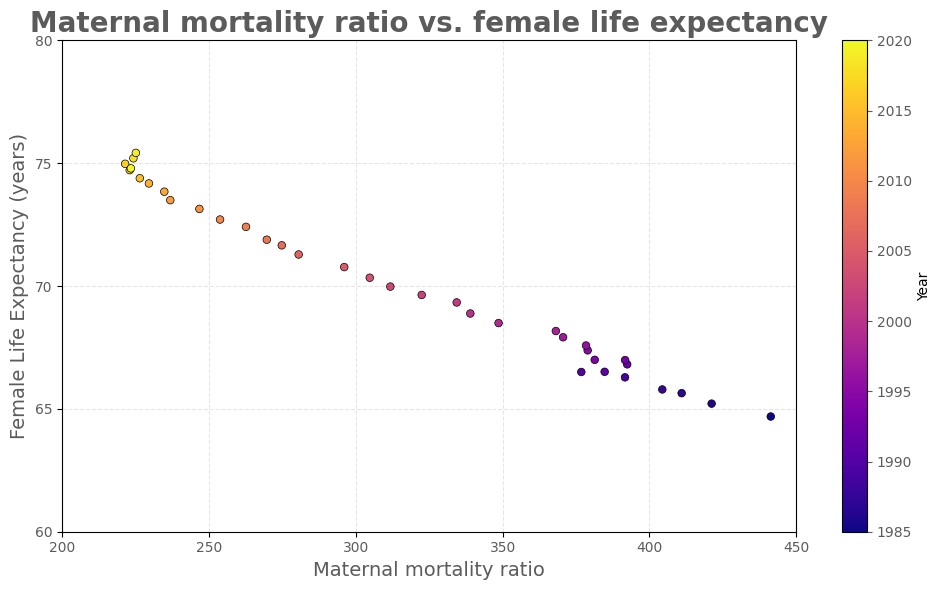

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create scatter plot with Matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    result['Mortality ratio'],
    result['Female life expectancy'],
    c=result['Year'],      # Color by year
    cmap='plasma',         # Use the 'plasma' colormap
    s=30,                  # Set marker size
    edgecolors='black',    # Set edge color of markers
    linewidth=0.5          # Set edge linewidth of markers
)

# Add gridlines
plt.grid(linestyle='--', color='black', alpha=0.1)

# Add titles and labels with custom font color
plt.title('Maternal mortality ratio vs. female life expectancy', fontsize=20, fontweight='bold', fontname='Playfair Display', color='#5b5b5b')
plt.xlabel('Maternal mortality ratio', fontsize=14, color='#5b5b5b')
plt.ylabel('Female Life Expectancy (years)', fontsize=14, color='#5b5b5b')
plt.xticks(fontsize=10, fontname='Lato', color='#5b5b5b')
plt.yticks(fontsize=10, fontname='Lato', color='#5b5b5b')

# Set axis tick locators
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))  # Set major ticks for x-axis at intervals of 50
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major ticks for y-axis at intervals of 10

# Set y-axis limits
plt.xlim(200,450)
plt.ylim(60, 80)

# Create custom legend for colormap and marker sizes
cbar = plt.colorbar(scatter, label='Year')
cbar.ax.tick_params(labelsize=10, colors='#5b5b5b')  # Adjust font size of legend labels
cbar.ax.yaxis.label.set_fontname('Lato')  # Set font name of legend label

# Show plot
plt.tight_layout()
#plt.savefig('maternal_mortality_scatterplot.png', dpi=300)
plt.show()
